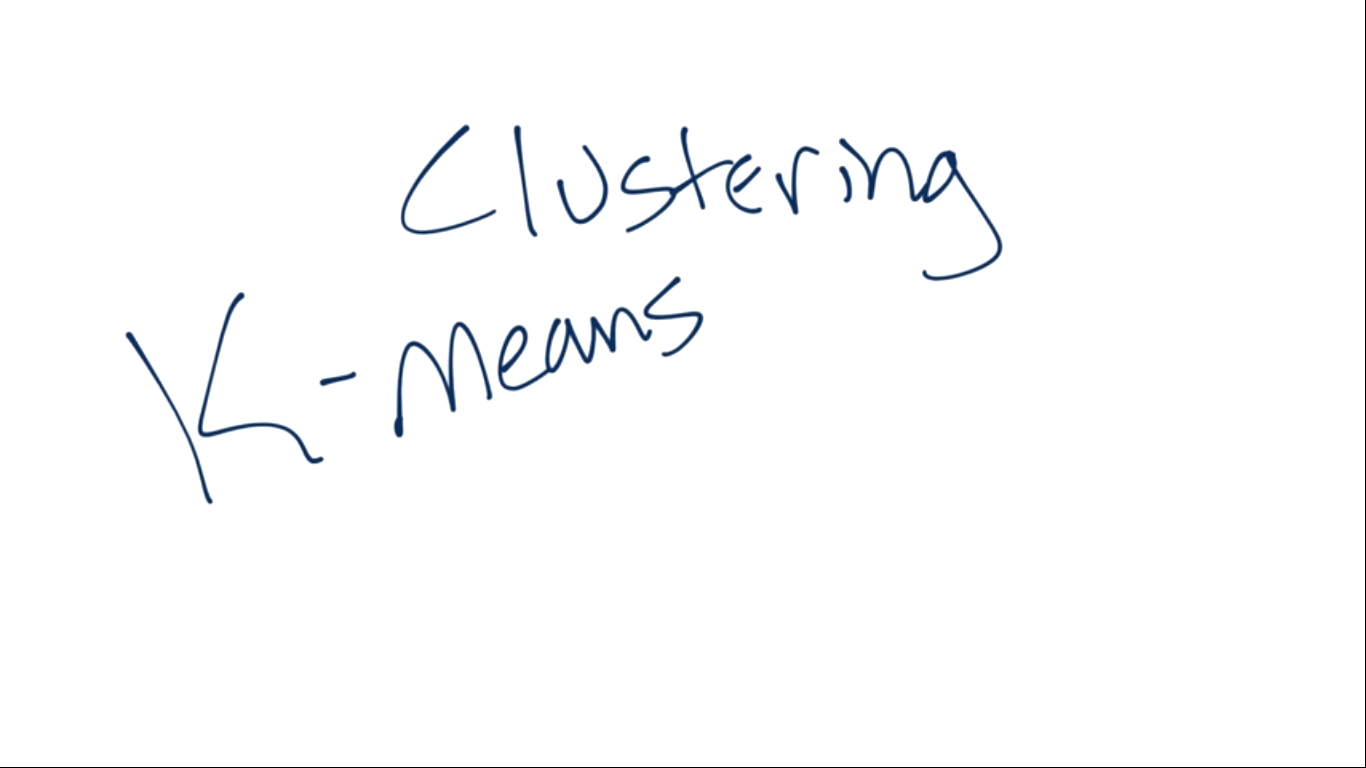

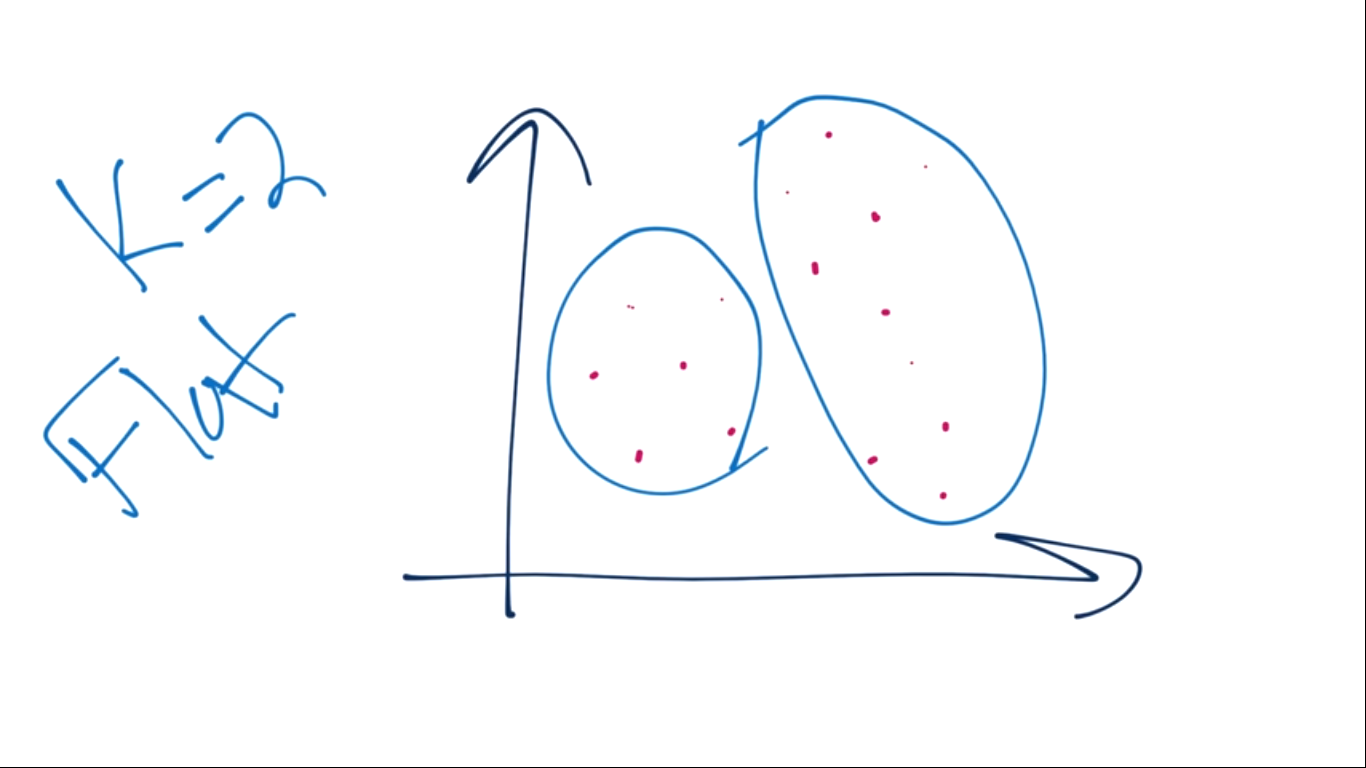

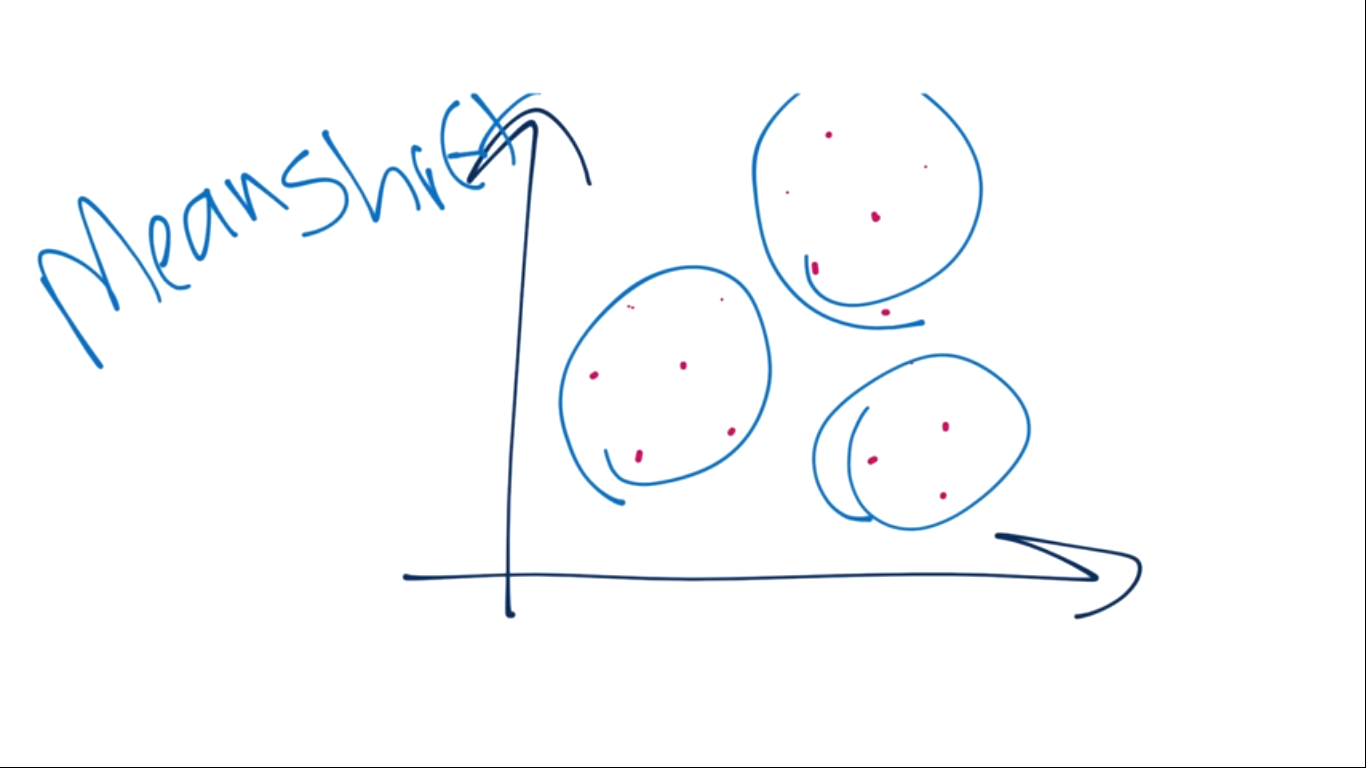

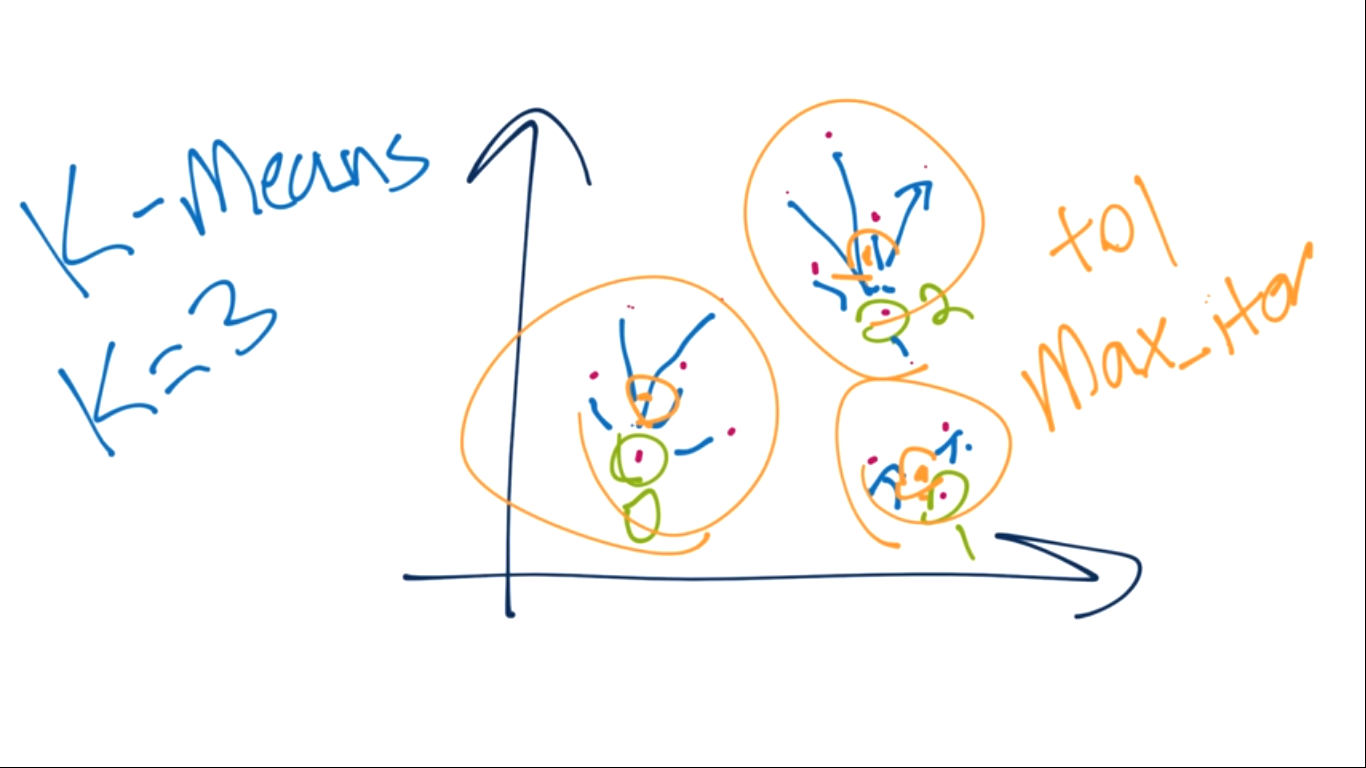

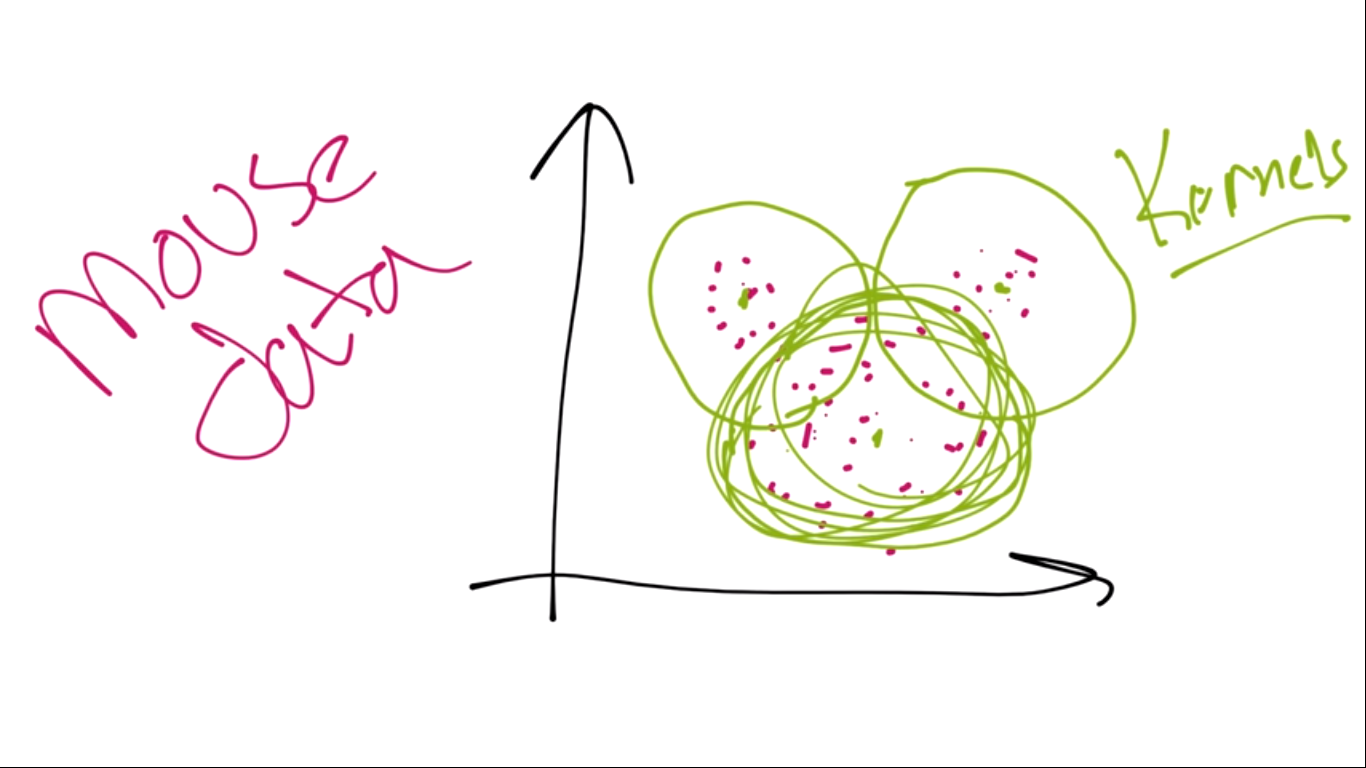

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [2]:
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

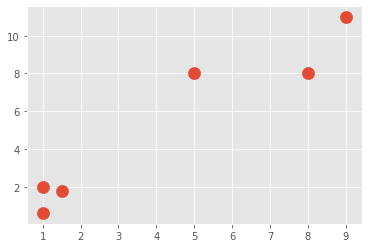

In [3]:
plt.scatter(x[:,0],x[:,1],s=150)
plt.show()

In [4]:
clf = KMeans(n_clusters=2)
clf.fit(x)

centroids = clf.cluster_centers_
labels = clf.labels_

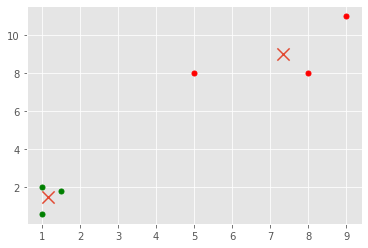

In [28]:
colors = 10*["g.","r.","c.","b.","k.","o."]

for i in range(len(x)):
    plt.plot( x[i][0], x[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5)
plt.show()

Titanic Dataset

In [6]:
df = pd.read_excel("D:\Local Disk E\Ahsan\OnlineCourse\Machine Learing\Practical-Implementation-of-ML\\titanic.xls")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
#df.drop(['body ','name '],1,inplace=True)
#df.convert_objects(convert_numeric=True)
df.fillna(0,inplace=True)

In [9]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [10]:
df = handle_non_numerical_data(df)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,685,0,29.0000,0,0,760,211.3375,38,1,2,0.0,302
1,1,1,63,1,0.9167,1,2,521,151.5500,117,1,19,0.0,50
2,1,0,1163,0,2.0000,1,2,521,151.5500,117,1,0,0.0,50
3,1,0,803,1,30.0000,1,2,521,151.5500,117,1,0,135.0,50
4,1,0,619,0,25.0000,1,2,521,151.5500,117,1,0,0.0,50


In [11]:
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0 
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    predcition = clf.predict(predict_me)
    if predcition[0] == y[i]:
        correct += 1
print (correct/len(X))

0.28953399541634833


In [12]:
#df.drop(['ticket'],1)

### lets make own Custom KMeans

In [39]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                pass
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            optimized = True
            
            for c in self.centroids:
                orignal_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                
                if np.sum((current_centroid - orignal_centroid)/orignal_centroid*100.0) > self.tol:
                    optimized = False
                
                if optimized:
                    break
    
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        
        return classification
        
        

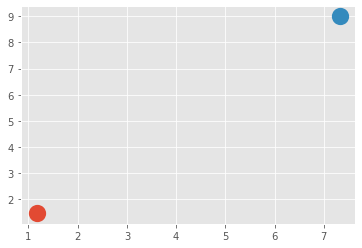

In [40]:
clf = K_Means()
clf.fit(x)


for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1], marker = "o",
                s=150,linewidths=5)

plt.show()

In [41]:
unknowns = np.array([[1,3],[8,9],[0,3],[5,4],[6,4]])

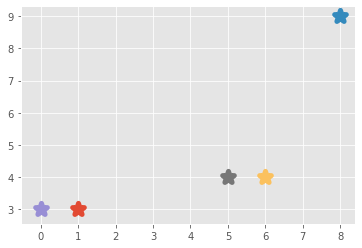

In [44]:
for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0],unknown[1],marker="*",s=150,linewidths=5)
plt.show()